## Import Libraries and Read data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
data = pd.read_csv(r"D:\Internships\Cellula\Projects\First\first inten project.csv")

## EDA

In [4]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [6]:
data.isna().sum().sort_values()

Booking_ID                  0
special requests            0
average price               0
P-not-C                     0
P-C                         0
repeated                    0
market segment type         0
date of reservation         0
lead time                   0
car parking space           0
type of meal                0
number of week nights       0
number of weekend nights    0
number of children          0
number of adults            0
room type                   0
booking status              0
dtype: int64

In [64]:
features_frame = data.drop(['booking status','Booking_ID'], axis= 1)
target = data["booking status"]

<Axes: xlabel='booking status', ylabel='count'>

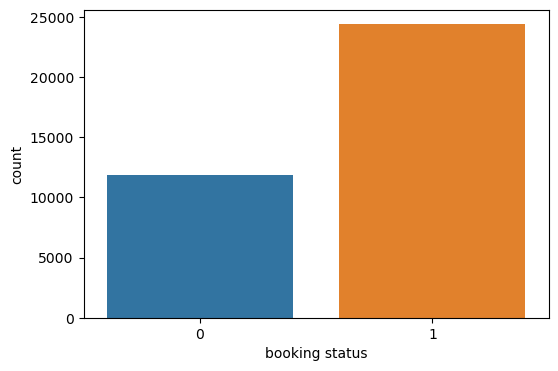

In [119]:
plt.figure(figsize=(6,4))
sns.countplot(x="booking status", data= target)

### Categorical Features

<Axes: xlabel='type of meal', ylabel='count'>

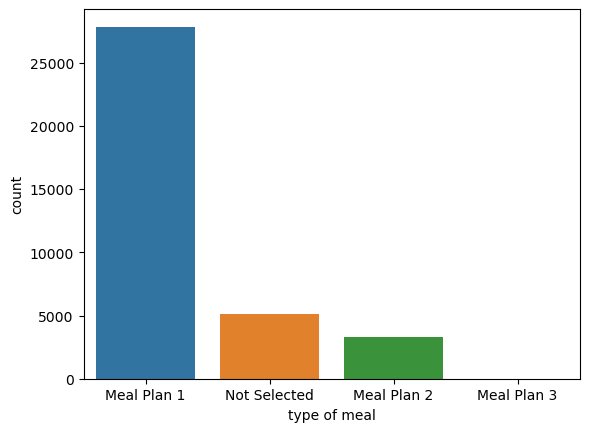

In [31]:
sns.countplot(x="type of meal", data= features_frame)

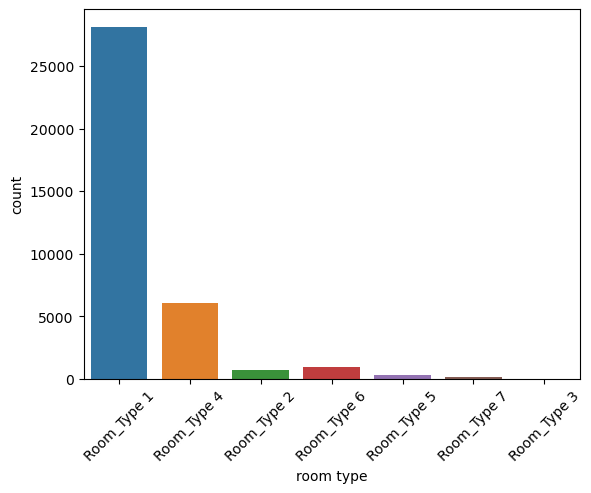

In [32]:
plt.Figure(figsize=(8,8))
room_plot = sns.countplot(x="room type", data= features_frame)
room_plot.set_xticklabels(room_plot.get_xticklabels(), rotation=45)
plt.show()

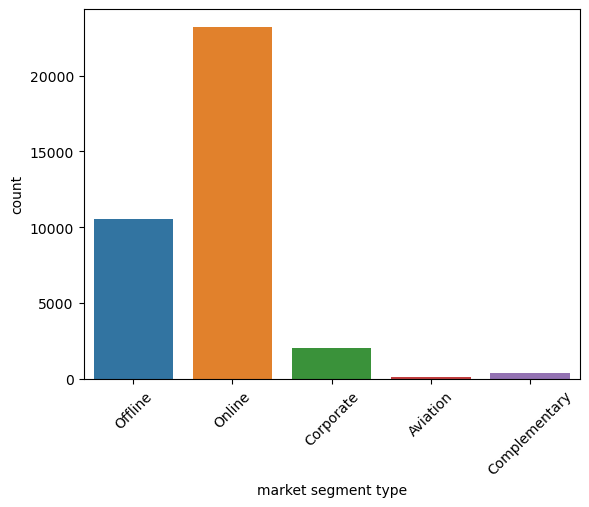

In [41]:
plt.Figure(figsize=(10,3))
room_plot = sns.countplot(x="market segment type", data= features_frame)
room_plot.set_xticklabels(room_plot.get_xticklabels(), rotation=45)
plt.show()

[None]

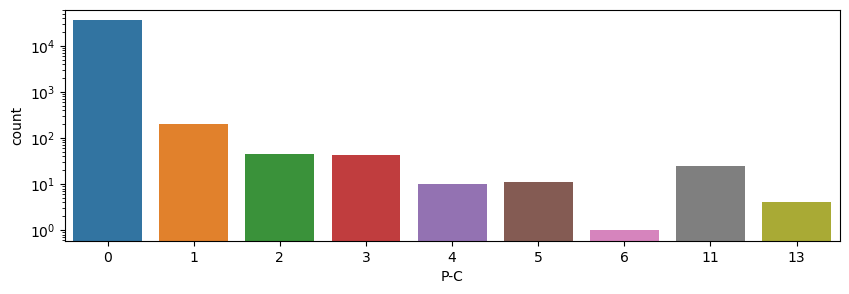

In [39]:
plt.figure(figsize=(10,3))
s = sns.countplot(x= "P-C", data= features_frame)
s.set(yscale= 'log')

[None]

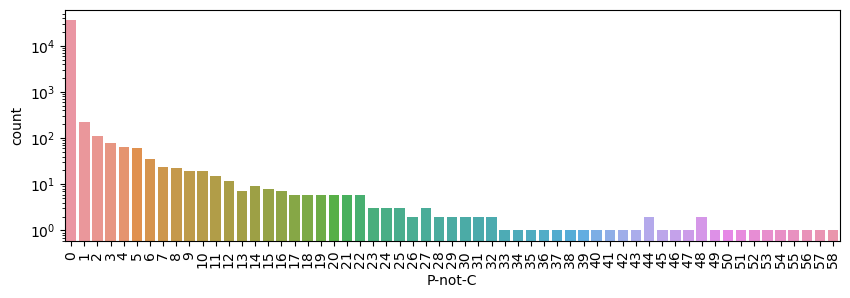

In [37]:
plt.figure(figsize=(10,3))
plot_pnotc = sns.countplot(x= "P-not-C", data= features_frame)
plt.xticks(rotation= 90)
plot_pnotc.set(yscale= 'log')

<Axes: xlabel='car parking space', ylabel='count'>

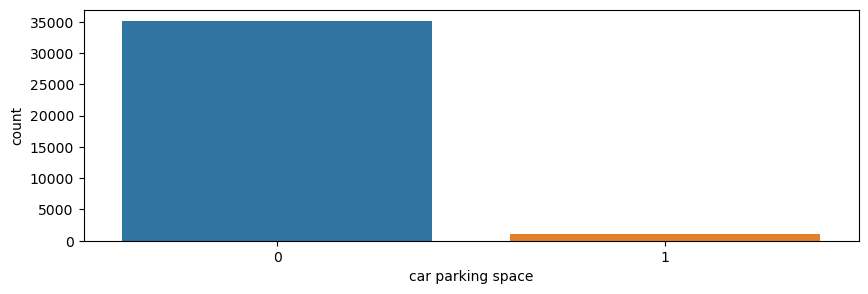

In [43]:
plt.figure(figsize=(10,3))
sns.countplot(x='car parking space', data= features_frame)

<Axes: xlabel='repeated', ylabel='count'>

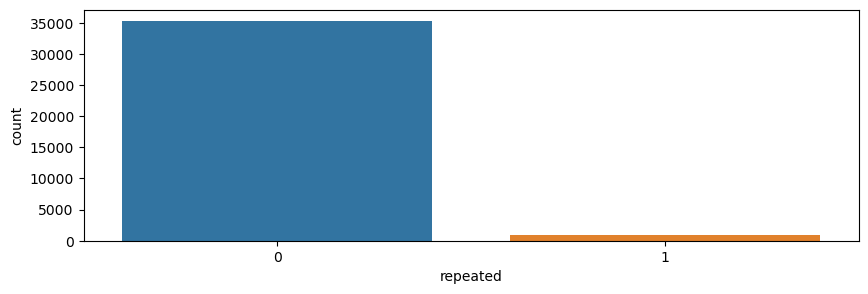

In [48]:
plt.figure(figsize=(10,3))
sns.countplot(x="repeated", data= features_frame)

In [67]:
target = target.reset_index().drop(['index'], axis= 1)
target["booking status"] = np.where(target['booking status'] == 'Not_Canceled',1, 0)

<Axes: xlabel='booking status', ylabel='count'>

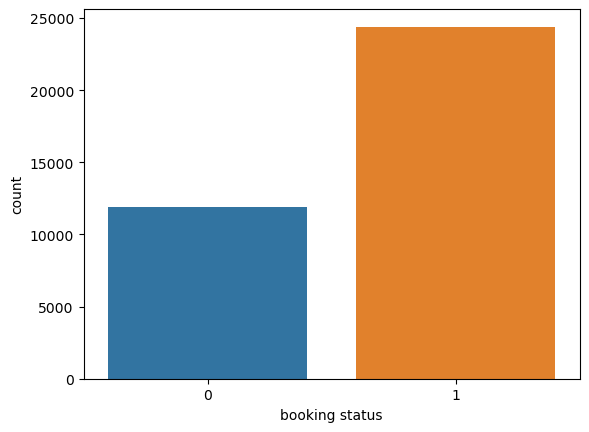

In [68]:
sns.countplot(x='booking status', data= target)

In [79]:
data["booking status"] = data["booking status"].apply(lambda x : 1 if x == "Not_Canceled" else 0)
df_cat = data[['type of meal','car parking space', 'room type', 'market segment type', 'repeated', 'P-C',
       'P-not-C',"booking status"]]

In [80]:
meal_target = df_cat.groupby('type of meal')['booking status'].agg(['sum','count'])
meal_target['non_cancelled_ratio'] = (meal_target['sum']) / meal_target['count']
meal_target['cancelled_ratio'] = 1 - meal_target['non_cancelled_ratio']

In [87]:
meal_target = meal_target.reset_index().drop(['sum','count'], axis= 1)

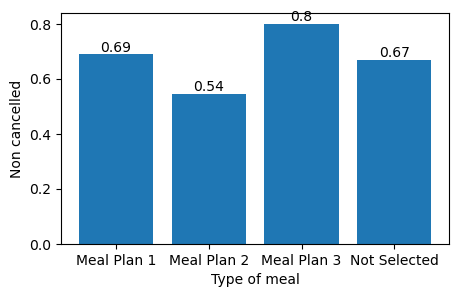

In [94]:
plt.figure(figsize=(5,3))
bars= plt.bar(meal_target['type of meal'], meal_target['non_cancelled_ratio'])
plt.xlabel("Type of meal")
plt.ylabel("Non cancelled")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [100]:
car_target = df_cat.groupby("car parking space")["booking status"].agg(["sum","count"]).reset_index()
car_target["non_cancelled_ratio"] = car_target["sum"] / car_target["count"]
car_target.drop(["sum","count"], axis=1, inplace= True)
car_target

,car parking space,non_cancelled_ratio
0,0,0.665112
1,1,0.898577


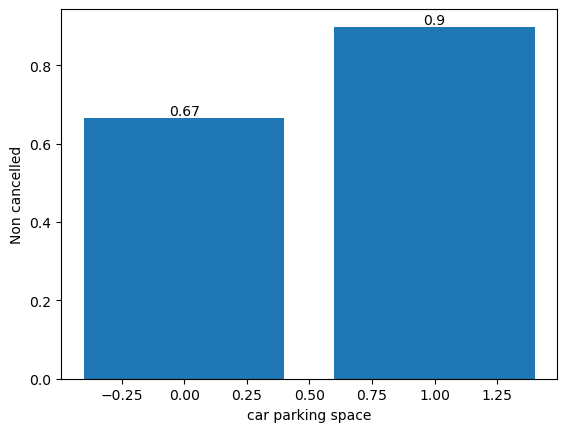

In [102]:
bars = plt.bar(car_target["car parking space"], car_target["non_cancelled_ratio"])
plt.xlabel("car parking space")
plt.ylabel("Non cancelled")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [104]:
room_target = df_cat.groupby("room type")["booking status"].agg(["sum","count"]).reset_index()
room_target["non_cancelled_ratio"]  = room_target["sum"] / room_target["count"]
room_target.drop(["sum","count"], axis= 1, inplace= True)
room_target

,room type,non_cancelled_ratio
0,Room_Type 1,0.677447
1,Room_Type 2,0.670520
2,Room_Type 3,0.714286
3,Room_Type 4,0.658525
4,Room_Type 5,0.728302
5,Room_Type 6,0.579710
6,Room_Type 7,0.772152


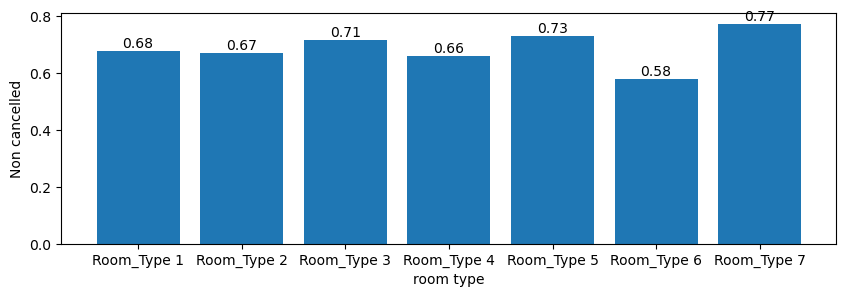

In [110]:
plt.figure(figsize=(10,3))
bars = plt.bar(room_target["room type"], room_target["non_cancelled_ratio"])
plt.xlabel("room type")
plt.ylabel("Non cancelled")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [111]:
df_cat_not_cancelled = df_cat[df_cat["booking status"] == 1]
df_cat_cancelled = df_cat[df_cat["booking status"] == 0]

In [113]:
pd.crosstab(df_cat_not_cancelled["room type"], df_cat_not_cancelled["type of meal"])

type of meal,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected
room type,,,,
Room_Type 1,14139,1569,0,3354
Room_Type 2,443,10,0,11
Room_Type 3,3,0,0,2
Room_Type 4,3769,185,1,35
Room_Type 5,180,5,0,8
Room_Type 6,511,28,0,21
Room_Type 7,116,2,3,1


In [114]:
pd.crosstab(df_cat_cancelled["room type"], df_cat_cancelled["type of meal"])

type of meal,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected
room type,,,,
Room_Type 1,6023,1366,1,1686
Room_Type 2,210,6,0,12
Room_Type 3,2,0,0,0
Room_Type 4,1981,88,0,0
Room_Type 5,62,9,0,1
Room_Type 6,367,38,0,1
Room_Type 7,36,0,0,0


In [124]:
pd.crosstab(df_cat_not_cancelled["room type"], df_cat_not_cancelled["market segment type"], normalize= 'columns')

market segment type,Aviation,Complementary,Corporate,Offline,Online
room type,,,,,
Room_Type 1,0.511364,0.631714,0.921536,0.904026,0.708472
Room_Type 2,0.000000,0.051151,0.001113,0.006642,0.026657
Room_Type 3,0.000000,0.005115,0.000556,0.000271,0.000000
Room_Type 4,0.488636,0.132992,0.043406,0.078081,0.219833
Room_Type 5,0.000000,0.043478,0.028937,0.007727,0.004545
Room_Type 6,0.000000,0.035806,0.001669,0.002711,0.035474
Room_Type 7,0.000000,0.099744,0.002782,0.000542,0.005019


In [126]:
pd.crosstab(df_cat_cancelled["room type"], df_cat_cancelled["market segment type"], normalize= 'index')

market segment type,Aviation,Corporate,Offline,Online
room type,,,,
Room_Type 1,0.001653,0.019502,0.339467,0.639379
Room_Type 2,0.000000,0.000000,0.035088,0.964912
Room_Type 3,0.000000,0.000000,0.000000,1.000000
Room_Type 4,0.010633,0.010150,0.017883,0.961334
Room_Type 5,0.000000,0.305556,0.333333,0.361111
Room_Type 6,0.000000,0.000000,0.007389,0.992611
Room_Type 7,0.000000,0.000000,0.027778,0.972222


In [122]:
df_cat_not_cancelled_2 = df_cat_not_cancelled.groupby("market segment type")["room type"].agg(["sum","count"])
df_cat_not_cancelled_2

,sum,count
market segment type,,
Aviation,Room_Type 1Room_Type 1Room_Type 1Room_Type 4Ro...,88
Complementary,Room_Type 1Room_Type 1Room_Type 1Room_Type 1Ro...,391
Corporate,Room_Type 1Room_Type 1Room_Type 1Room_Type 1Ro...,1797
Offline,Room_Type 1Room_Type 1Room_Type 1Room_Type 1Ro...,7377
Online,Room_Type 1Room_Type 1Room_Type 4Room_Type 4Ro...,14743


In [132]:
market_target = df_cat.groupby('market segment type')['booking status'].agg(['sum','count']).reset_index()
market_target["non_cancelled_ratio"] = market_target["sum"] / market_target["count"]
market_target.drop(["sum","count"], axis= 1, inplace= True)
market_target

,market segment type,non_cancelled_ratio
0,Aviation,0.704000
1,Complementary,1.000000
2,Corporate,0.890927
3,Offline,0.700503
4,Online,0.634899


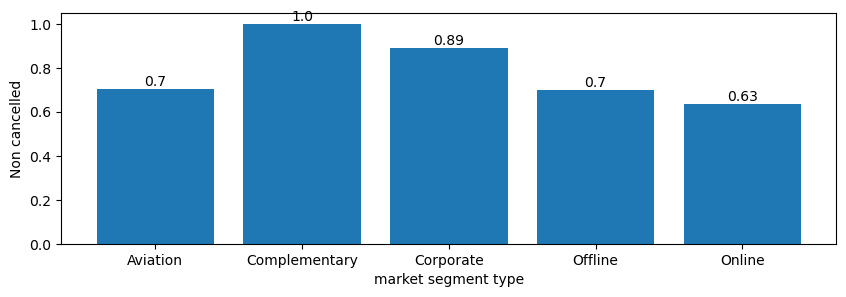

In [133]:
plt.figure(figsize=(10,3))
bars = plt.bar(market_target["market segment type"], market_target["non_cancelled_ratio"])
plt.xlabel("market segment type")
plt.ylabel("Non cancelled")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

### Time-Series Analysis

In [46]:
features_frame.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'date of reservation'],
      dtype='object')

### Numerical Data

In [61]:
features_frame.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000
